<div style='display:flex;flex-direction:row;justify-content:space-between;'>
    <span>Flörian Döring, Lukas Wrana &nbsp;</span>
    <span style='color:lightgrey;'>Computer assisted mathematics, 2024 <b>[Seminar]</b></span>
</div>

# **Cramer's Rule**

---

## **Outline**

1. Introduction
2. Geometric Interpretation
3. Simple proof
4. Sage Implementation
    1. Code
    2. Valdiation
    3. Perfomance
6. Examples
    1. Single dimension
    2. 2 - dimensions
    3. 3 - dimensions
8. Cramer's Rule calculator

---

## **1. Introduction**

**Cramer's Rule** provides an explicit formula for the solution of a system of linear equations with as many equations as unknowns, valid whenever the system has a unique solution.

&nbsp;

<div style="background-color: rgb(240, 240, 240); padding: 1rem 3rem; margin: 0 3rem; border-radius: .1rem;">
    
### **Definiton**

Suppose a system of linear quations 

$$A\mathbf x = \mathbf b$$ 

where $A\in\mathbb K^{n\times n}$ and $\mathbf b\in\mathbb K^n$ for $n\in \mathbb N$.

If $\det(A)\neq 0$, the individiual values of the solution $\mathbf x = (x_1,...,x_n)^{\text T}$ are given by:

$$x_i=\frac {\det(A_i)} {\det(A)}\qquad i=1,...,n $$

where $A_i$ is the matrix formed by replacing the $i$\-th column of $A$ with $\mathbf b$.
</div>

&nbsp;

### **History**

The rule was named after _Gabriel Cramer_ \(1704\-1752\) for an arbitrary number of unknowns in 1750. However _Gottfried Wilhelm Leibniz_ wrote down Cramer's rule in a manuscript as early as 1678. The proof of Cramer's rule was first provided by _Augustin Louis Cauchy_ in 1815, when he also introduced the notation of Cramer's rule used today.

---

## **2. Geometric interpretation**

Calculating solutions with Cramer's Rule is very inefficient compared to other methods, like Gaussian-Elimination. However, Cramer's Rule gives valuable inside in the nature of systems of linear equations.

Given a $2$-dimensional system of equations:

$$\begin{align}
a_{11}\cdot x_1 + a_{12}\cdot x_2 &= b_1\\
a_{21}\cdot x_1 + a_{22}\cdot x_2 &= b_2
\end{align}$$

We can think of this system as as given matrix $A=\begin{bmatrix}a_{11}&a_{12}\\a_{21}&a_{22}\end{bmatrix}$ transforming an unknown vector $\mathbf x=\begin{pmatrix}x_1\\x_2\end{pmatrix}$ to match the given vector $\mathbf b=\begin{pmatrix}b_1\\b_2\end{pmatrix}.$

The columns of $A$, let's call them and tell us, where the basis vectors of our input system land. To solve our system, we would have to find a linear combinattion of these two vectors that matches $\mathbf b$. Our setup should look something like this:



In [86]:
inputA = matrix(RR, [[1, 1],[-1, 3]])
inputb = vector([2, 1])

@interact
def _(A=input_box('[[1, 1],[-1, 3]]', 'A: 2x2 matrix', str), b=input_box('[2, 1]', 'b: 2-dim vector', str)):
    try:
        A = matrix(RR, eval(A))
        b = vector(eval(b))

        inputA = A
        inputb = b
    except:
        print('Invalid input.')
        return
    
    if not (A.nrows() == A.ncols() == len(b)):
        print('Invalid dimensions.')
        return
    
    a1 = A.column(0)
    a2 = A.column(1)
    
    arr1 = arrow2d([0, 0], b, color='black', legend_label='b')
    arr2 = arrow2d([0, 0], a1, color='red', legend_label='1. column of A')
    arr3 = arrow2d([0, 0], a2, color='blue', legend_label='2. column of A')
    
    show(plot(arr1 + arr2 + arr3))

Interactive function <function _ at 0x12f8e4220> with 2 widgets
  A: TransformText(value='[[1, 1],[-1, 3]]', description='A: 2x2 matrix', layout=Layout(max_width='81em'))
  b: TransformText(value='[2, 1]', description='b: 2-dim vector', layout=Layout(max_width='81em'))

If we look at our unknown vector $\mathbf x$ in the canoncial standard basis:

$$e_1=\begin{pmatrix}1\\0\end{pmatrix},\quad e_2=\begin{pmatrix}0\\1\end{pmatrix}$$

we can express the $x_1$ coordinate of $\mathbf x$ by the signed area of the parallelogram spanned by $e_2$ and $\mathbf x$.

&nbsp;

<div style="background-color: rgb(240, 240, 240); padding: 1rem 3rem; margin: 0 3rem; border-radius: .1rem;">
Note that the area of a prallaleogram $\mathbf P$ is given by the length of its basis $b$ multiplied by the height $h$:
$$\text{Area}\;\mathbf P = b\cdot h$$
</div>

&nbsp;

Using the same technique, $x_2$ ist the signed area of the parallellogram spanned by $e_1$ and $\mathbf x$.

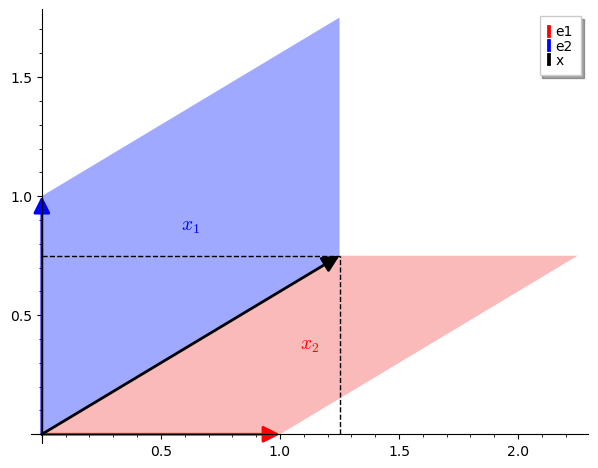

In [85]:
e1 = vector([1, 0])
e2 = vector([0, 1])

x = inputA.solve_right(inputb)

p = arrow2d([0, 0], e1, color='red', legend_label='e1') + arrow2d([0, 0], e2, color='blue', legend_label='e2') + arrow2d([0, 0], x, color='black', legend_label='x')

if x != None:
    area1 = polygon([[0, 0], e1, e1 + x, x], color='#fabab9')
    area2 = polygon([[0, 0], e2, e2 + x, x], color='#9ea9ff')

    line1 = line([[x[0], 0], x], linestyle='dashed', color='black')
    line2 = line([[0, x[1]], x], linestyle='dashed', color='black')

    text1 = text(r'$x_2$', e1 + (x - e1) / 2, fontsize=14, color='red', horizontal_alignment='center')
    text2 = text(r'$x_1$', e2 + (x - e2) / 2, fontsize=14, color='blue', horizontal_alignment='center')

    p = area1 + area2 + line1 + line2 + text1 + text2 + p

show(plot(p))

Just like all the other arguments in this section, this representation also works in higher (or lower) dimensions. It has a name that you will probably recognise:

&nbsp;

<div style="background-color: rgb(240, 240, 240); padding: 1rem 3rem; margin: 0 3rem; border-radius: .1rem;">

### **Determinant**
Geometrically, the Determinant is given by the signed $n$-dimensional volume of a $n$-dimensional **parallelepiped** (solid body of which each face is a parallelogram), created by the column vectors of a $n\times n$-matrix.

It represents the scale factor by which volumes are transformed by a matrix.

</div>

&nbsp;

Notice, that what we did above is caclulate $x_1$, the determinat of a matrix with $e_2$ and $\mathbf x$ as columns, and $x_2$, the determinant of a matrix with $e_1$ and $\mathbf x$ as columns.

If we go back to our original matrix $A$. We now know that $\det A$ is the factor, by which all areas are transformed by $A$. Since we constructed $x_1$ and $x_2$ to be areas, we know that the transformed area would be equal to the parallelogram formed with one column of $A$ and $b$:

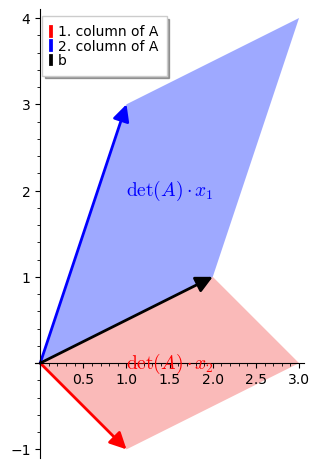

In [84]:
a1 = inputA.column(0)
a2 = inputA.column(1)

p = arrow2d([0, 0], a1, color='red', legend_label='1. column of A') + arrow2d([0, 0], a2, color='blue', legend_label='2. column of A') + arrow2d([0, 0], inputb, color='black', legend_label='b')

if x != None:
    area1 = polygon([[0, 0], a1, a1 + inputb, inputb], color='#fabab9')
    area2 = polygon([[0, 0], a2, a2 + inputb, inputb], color='#9ea9ff')

    text1 = text(r'$\det(A)\cdot x_2$', a1 + (inputb - a1) / 2, fontsize=14, color='red', horizontal_alignment='center')
    text2 = text(r'$\det(A)\cdot x_1$', a2 + (inputb - a2) / 2, fontsize=14, color='blue', horizontal_alignment='center')

    p = area1 + area2 + text1 + text2 + p

show(plot(p))

We get the following:

$$
\det\begin{bmatrix}\mathbf b_1&a_{12}\\\mathbf b_2&a_{22}\end{bmatrix} = \det(A)\cdot x_1 \Rightarrow x_1 = \dfrac {\det\begin{bmatrix}\mathbf b_1&a_{12}\\\mathbf b_2&a_{22}\end{bmatrix}} {\det(A)}=\dfrac{\det(A_1)}{\det(A)}\\
\det\begin{bmatrix}a_{11}&\mathbf b_1\\a_{21}&\mathbf b_2\end{bmatrix} = \det(A)\cdot x_2 \Rightarrow x_2 = \dfrac {\det\begin{bmatrix}a_{11}&\mathbf b_1\\a_{21}&\mathbf b_2\end{bmatrix}}{\det(A)}=\dfrac{\det(A_2)}{\det(A)}\\
$$

where $A_i$ is the matrix formed by replacing the $i$-th column of $A$ with $\mathbf b$ for $i=1, 2$. We have thus derived Cramer's rule in two dimensions.

If $\det(A)$ happens to be $0$. Our transformed vectorspace would collapse into a lower dimension. The system would then have either none solution at all or many (but not a unique one).

Everything we did works on higher or lower dimensions as well. Instead of the area of two dimensional parallelogram, we would be looking at the volume of an $n$ dimensional parallelepiped, which is a lot harder to visualize.


---

## **3. Proof**

Let $\mathbf X_i\in\mathbb K^{n\times n}$ be the matrix formed by replacing the $i$-th column of the Identity Matrix, with $\mathbf x=(x_1,…,x_n)^{\text T}\in\mathbb K^n$.

$$\mathbf X_i=\begin{bmatrix}
1&&x_1\\
&\ddots&\vdots\\
&&x_i\\
&&\vdots&\ddots\\
&&x_n&&1
\end{bmatrix}$$

By using Laplace expansion on the the $i$-th column, we get:

$$\begin{align}
\det(\mathbf X_i) &= \sum_{j=1}^n (-1)^{i+j} x_j \det(\mathbf S_{j,i})\\
&= (-1)^{2i}x_i \det\begin{bmatrix}1\\&\ddots\\&&1\end{bmatrix} + \sum_{j=1, j≠i}^n (-1)^{i+j} x_j \det(\mathbf S_{j,i})\\
&= x_i\qquad\forall i=1,…,n
\end{align}$$

where $\mathbf S_{j,i}$ is the submatrix obtained by removing the $j$-th row and the $i$-th column of $X_i$. All $S_{j,i}$ are triangular matrices. For those with $i≠j$, we can also observe that they contain a row where all values are 0. Since the determinant of any triangular matrix can be given by the product of the diagonal entries, $\det(\mathbf S_{j,i}) = 0$ for $j≠i$.

Let $A\in\mathbb K^{n\times n}$, then: 

$$\begin{align}
A\mathbf X_i&=
\begin{bmatrix}
a_{11}&a_{12}&\dots&a_{1n-1}&a_{1n}\\
a_{21}&a_{22}&\dots&a_{2n-1}&a_{2n}\\
\vdots&\vdots&\ddots&\vdots&\vdots\\
a_{n-11}&a_{n-12}&\dots&a_{n-1n-1}&a_{n-1n}\\
a_{n1}&a_{n2}&\dots&a_{nn-1}&a_{nn}\\
\end{bmatrix}
\begin{bmatrix}1&&x_1\\&\ddots&\vdots\\&&x_i\\&&\vdots&\ddots\\&&x_n&&1\end{bmatrix}\\
&=\begin{bmatrix}
a_{11}&\dots&a_{1i-1}&a_{11}x_1+…+a_{1n}x_n&a_{1i+1}&\dots&a_{1n}\\
a_{21}&\dots&a_{2i-1}&a_{21}x_1+…+a_{2n}x_n&a_{2i+1}&\dots&a_{2n}\\
\vdots&\ddots&\vdots&\vdots&\vdots&\ddots&\vdots\\
a_{n-11}&\dots&a_{n-1i-1}&a_{n-11}x_1+…+a_{n-1n}x_n&a_{n-1i+1}&\dots&a_{n-1n}\\
a_{n1}&\dots&a_{ni-1}&a_{n1}x_1+…+a_{nn}x_n&a_{ni+1}&\dots&a_{nn}\\
\end{bmatrix}\\
&=\begin{bmatrix}
a_{11}&\dots&a_{1i-1}&b_1&a_{1i+1}&\dots&a_{1n}\\
a_{21}&\dots&a_{2i-1}&b_2&a_{2i+1}&\dots&a_{2n}\\
\vdots&\ddots&\vdots&\vdots&\vdots&\ddots&\vdots\\
a_{n-11}&\dots&a_{n-1i-1}&b_{n-1}&a_{n-1i+1}&\dots&a_{n-1n}\\
a_{n1}&\dots&a_{ni-1}&b_n&a_{ni+1}&\dots&a_{nn}\\
\end{bmatrix}=A_i
\end{align}$$

By the product rule for determinants follows:

$$\begin{alignat}{4}
&& \det(A) &\,\cdot&\, \det(\mathbf X_i) &= \det(A_i) \\
\Leftrightarrow \qquad&& \det(A) &\,\cdot & x_i &= \det(A_i) \\
\Leftrightarrow \qquad&& &&x_i&=\dfrac{\det(A_i)}{\det(A)}\qquad i=1,…,n
\end{alignat}$$

$\square$

---

## **4. Sage Implementation**

### **4.A Code**

In [2]:
def cramer(A, b):
    # A: n x n - Matrix
    # b: Vector of length n
    if not (A.nrows() == A.ncols() == len(b)):
        return
    
    n = A.nrows()
    x = zero_vector(SR, n)
    detA = A.det()
    
    # if det(A) = 0, the system of linear equations doesn't
    # have a explicit solution.
    if detA == 0:
        return
    
    for i in range(n):
        Ai = copy(A)  # a copy of A
        Ai[:,i] = b   # replace the i'th column with b
        x[i] = Ai.det() / detA
    return x

&nbsp;

### **4.B Testing**

To show that this function does indeed deliver the correct result, we conducted some testing. For a given $n\in\mathbb N$ we compare the result of our cramer implementation to the result of sages built in algorithm (with tolerance), over multiple iterations of random generated systems of linear equations.

In [119]:
def random_vector(size):
    return vector([random() for t in range(size)])

# we have to compare the vectors with a given tolerance to
# account for small numeric deviations
def equal(u, v, tol = 1e-6):
    return all(abs(a - b) < tol for a, b in zip(u, v))

def validation(iterations, n):
    for i in range(iterations):
        M = random_matrix(RR, n, n)
        v = random_vector(n)

        # if det(A) = 0, the result of our function cannot be compared
        if not equal(cramer(M, v), M.solve_right(v)) and M.det() != 0:
            print('Test failed.')
            return

    print('Test successfull.')

validation(100, 2)
validation(100, 4)
validation(100, 8)
validation(100, 16)

Test successfull.
Test successfull.
Test successfull.
Test successfull.


&nbsp;

### **4.C Perfomance**

Cramer's rule is not practical for numeric computations. To solve a soystem of $n$ linear equations with Cramer's rule, we would need to calculate $n+1$ determinants of n$\times n$-matrices. This takes a lot of extra computations that aren't needed in other methods. To visualize this, we can plot the execution time of our implementation of Cramer's rule and the native sage function to solve the system side by side for $n=1,...,12$.

<span style='color:lightgrey;'>We could of course go even further, but we would then have to use a log-log plot to even find the execution time of native sage.</span>


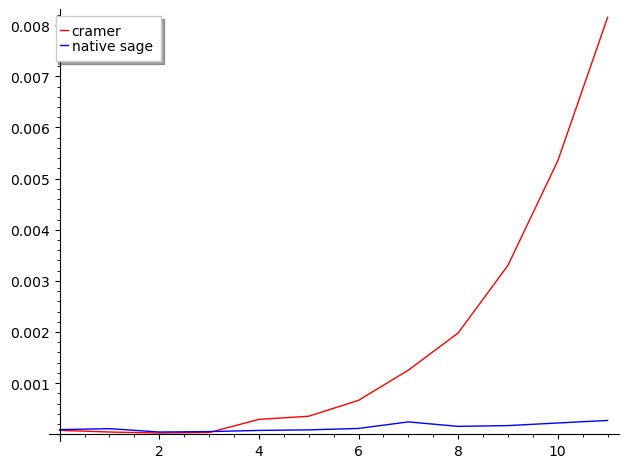

In [82]:
import time

t_cramer = []
t_standart = []

avg = 16

for i in range(12):
    M = random_matrix(RR, i, i)
    b = random_vector(i)

    t = 0

    for j in range(avg):
        start = time.time()
        cramer(M, b)
        end = time.time()
        t += end - start

    t_cramer.append(t / avg)
    t = 0

    for j in range(avg):
        start = time.time()
        M.solve_right(b)
        end = time.time()
        t += end - start

    t_standart.append(t / avg)

show(list_plot(t_cramer, plotjoined=True, color="red", legend_label='cramer') + list_plot(t_standart, plotjoined=True, legend_label='native sage'))


---

## **5. Examples**

### **5.A  Single dimension**

Let's start with a trivial example. We want to find $\mathbf x\in\mathbb K$ with

$$a\mathbf x = b$$

for $a, b\in\mathbb K$. Cramer's rule implies the same operation we'd do to solve for $\mathbf x$:

$$\Rightarrow \mathbf x = \dfrac b a$$

### **5.B  2 – dimensions**

Let $A\mathbf x=b$ with

$$
A := \begin{bmatrix}1&2\\3&4\end{bmatrix}\in\mathbb Q^{2\times 2},\qquad \mathbf x:=\begin{bmatrix}x_1\\x_2\end{bmatrix},\qquad b:=\begin{bmatrix}1\\2\end{bmatrix}\in\mathbb Q^2
$$

The determinant of a $2\times 2$-matrix is given by:

$$\begin{align}
\det\begin{bmatrix}a&c\\b&d\end{bmatrix}&=ad - bc\\
\Rightarrow\det(A)&= 1\cdot 4 - 2\cdot 3 =-2
\end{align}$$

We can use this to calculate $\mathbf x$:

$$\begin{align}
x_1 &= \dfrac {\det\begin{bmatrix}\mathbf 1&2\\\mathbf 2&4\end{bmatrix}} {\det(A)} = \dfrac 0 {-2}=0\\
x_2 &= \dfrac {\det\begin{bmatrix}1&\mathbf 1\\3&\mathbf 2\end{bmatrix}} {\det(A)} = \dfrac {-1}{-2}= \dfrac 1 2
\end{align}$$

As a result $\mathbf x=\begin{pmatrix}0,&\dfrac 1 2\end{pmatrix}$.

In [34]:
A = matrix(QQ, [[1, 2],[3, 4]])
b = vector([1, 2])

show(cramer(A, b))

(0, 1/2)

### **5.C  3 – dimensions**

Let $A\mathbf x=b$ with

$$
A := \begin{bmatrix}9&8&7\\6&0&4\\3&2&1\end{bmatrix}\in\mathbb Q^{3\times 3},\qquad \mathbf x:=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix},\qquad b:=\begin{bmatrix}1\\2\\3\end{bmatrix}\in\mathbb Q^3
$$

The determinant of a $3\times 3$-matrix is given by the rule of Sarrus:

$$\begin{align}
\det\begin{bmatrix}a&b&c\\d&e&f\\g&h&i\end{bmatrix}&=aei+bfg+cdh-ceg-bdi-afh\\
\Rightarrow\det(A)&= 9\cdot 0\cdot 1 + 8\cdot 4\cdot 3+7\cdot 6\cdot 2 -7\cdot 0\cdot 3 -8\cdot6\cdot 1-9\cdot 4\cdot 2 = 60
\end{align}$$

We can use this to calculate $\mathbf x$:

$$\begin{align}
x_1 &= \dfrac {\det\begin{bmatrix}\mathbf 1&8&7\\\mathbf 2&0&4\\\mathbf 3&2&1\end{bmatrix}} {\det(A)} = \dfrac {100} {60}=\dfrac 5 3\\
x_2 &= \dfrac {\det\begin{bmatrix}9&\mathbf 1&7\\6&\mathbf 2&4\\3&\mathbf 3&1\end{bmatrix}} {\det(A)} = \dfrac 0 {60}= 0\\
x_3 &= \dfrac {\det\begin{bmatrix}9&8&\mathbf 1\\6&0&\mathbf 2\\3&2&\mathbf 3\end{bmatrix}} {\det(A)} = \dfrac {-120} {60}=-2
\end{align}$$

As a result $\mathbf x=\begin{pmatrix}\dfrac 5 3,&0,&-2\end{pmatrix}$.

In [40]:
A = matrix(QQ, [[9, 8, 7],[6, 0, 4],[3, 2, 1]])
b = vector([1, 2, 3])

show(cramer(A, b))

(5/3, 0, -2)

&nbsp;

---

## **6. Cramer's Rule calculator**

Trying to solve even bigger systems of linear equations with Cramer's rule and calculation the necessary determinats would be a tedious process. We advise to switch to other methods like the gaussian-algorithm. If you insist to use Cramer's rule, you can use the following input cell and let sage do the hard part.

In [117]:
@interact
def _(K=input_box('ZZ', 'K: field', str), A=input_box('[[1, 1],[-1, 3]]', 'A: nxn', str), b=input_box('[2, 1]', 'b: n-dim', str)):
    try:
        A = matrix(eval(K), eval(A))
        b = vector(eval(b))
    except:
        print('Invalid input.')
        return
    
    if not (A.nrows() == A.ncols() == len(b)):
        print('Invalid dimensions.')
        return
    
    n = A.nrows()
    x = zero_vector(SR, n)
    detA = A.det()
    
    print('\nSolving the following system of equations with Cramer\'s rule:\n')

    rows = [' & '.join(map(str, row)) for row in A]
    matrix_latex = r'\begin{{bmatrix}} {} \end{{bmatrix}}\mathbf x ='.format(' \\\\ '.join(rows))
    vector_latex = r'\begin{{pmatrix}} {} \end{{pmatrix}}'.format(' \\\\ '.join(map(str, b)))
    show(LatexExpr(matrix_latex + vector_latex))

    print('\nSolution:\n')
    show(LatexExpr(r'\det{{(A)}}=\det\begin{{bmatrix}} {} \end{{bmatrix}} ='.format(' \\\\ '.join(rows))), detA)
    
    if detA == 0:
        return
    
    for i in range(n):
        Ai = copy(A)  # a copy of A
        Ai[:,i] = b   # replace the i'th column with b
        x[i] = Ai.det() / detA

        rows = [' & '.join(map(str, row)) for row in Ai]

        print()
        show(LatexExpr())
        show(LatexExpr(r'\qquad x_{} ='.format(i) + r'\dfrac{{\det\begin{{bmatrix}} {} \end{{bmatrix}}}}{{\det{{(A)}}}}='.format(' \\\\ '.join(rows)) + r'\dfrac{}{} ='.format(Ai.det(), detA)), x[i])
    
    print('\nResult:\n')
    show(LatexExpr(r'\mathbf x='), x)

Interactive function <function _ at 0x12c5353a0> with 3 widgets
  K: TransformText(value='ZZ', description='K: field', layout=Layout(max_width='81em'))
  A: TransformText(value='[[1, 1],[-1, 3]]', description='A: nxn', layout=Layout(max_width='81em'))
  b: TransformText(value='[2, 1]', description='b: n-dim', layout=Layout(max_width='81em'))